# Simple Linear Regression Model Using Scikit-learn

In [1]:
# import pandas and read the data into a pandas dataframe.
import pandas as pd
import numpy as np

data = pd.read_csv('Advertising.csv', index_col=0)

In [2]:
%matplotlib inline

In [3]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
# import the scikit-learn module for linear regression.
from sklearn.linear_model import LinearRegression

# set up the data
x = data.TV
y = data.Sales

# instantiate and fit the model
model = LinearRegression()
model.fit(x[:, np.newaxis], y)

# calculate R-squared

model.score(x[:, np.newaxis], y)

0.61187505085007099

In [5]:
# print intercept and slope (regression coefficients)

print model.intercept_, model.coef_

7.03259354913 [ 0.04753664]


In [6]:
# how does the model perform on unseen data? Run model on testing data.

dataTest = pd.read_csv('AdSpend_test.csv')

x_test = dataTest.AdSpend

predictions = model.predict(x_test[:, np.newaxis])

# calculate R-squared

SSE = 0
SST = 0
for i in range(len(dataTest.Sales)-1):
    SSE += (dataTest.Sales[i] - predictions[i])**2
    SST += (dataTest.Sales[i] - dataTest.Sales.mean())**2
 
R_squared_test = 1 - SSE/SST

R_squared_test


0.78624394771740791

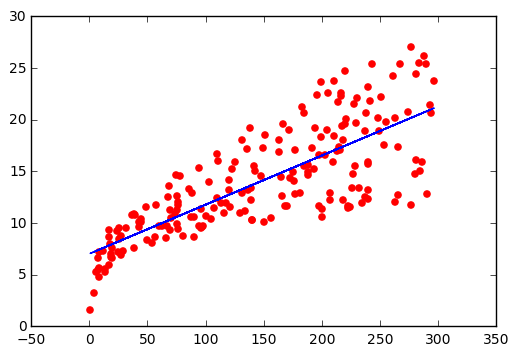

In [7]:
from matplotlib import pyplot as plt

plt.scatter(x, y, color='red')
plt.plot(x, model.predict(x[:, np.newaxis]), color='blue')